In [10]:
import os.path as op 
import xarray as xr 
import numpy as np 
from projection_test import SUBIDS, loadnii, loadfunc, OUTROOT, EXPERIMENTS, TESTS
from analysis_scripts import x_array
import itertools 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from pdb import set_trace

cmap = np.array(plt.get_cmap('tab20').colors)
METHODS = ['tob', 'wb', 'tob_sp', 'wb_sp']
METRIC = ['rms', 'max', 'min']
MASKED_RMS = lambda a,b,mask: np.sqrt(((a[mask] - b[mask])**2).mean())
# %qtconsole

In [12]:
N_SUBS = 10
vsv = x_array(coords={'experiment': EXPERIMENTS, 'sub': range(N_SUBS),
                      'test': TESTS, 'meth': METHODS, 'metric': METRIC})
svs = x_array(coords={'experiment': EXPERIMENTS, 'sub': range(N_SUBS), 
                      'test': TESTS, 'meth': METHODS, 'metric': METRIC})

for exp in EXPERIMENTS:
    for idx,sub in enumerate(SUBIDS()[:N_SUBS]):
        for test in TESTS: 
            sd = op.join(OUTROOT, exp, sub)
            vtruth = loadnii(op.join(sd, '%s.nii.gz' % test)) 
            if exp == 'wm_cbf':
                vtruth += loadnii(op.join(sd, 'wm_%s.nii.gz' % test)) 
            mask = (vtruth > 0)
            struth = loadfunc(op.join(sd, '%s.func.gii' % test))
            smask = loadfunc(op.join(sd, 'smask.func.gii')).astype(np.bool)
            
            for meth in METHODS: 
                try: 
                    path = op.join(sd, '%s_v2s2v_%s.nii.gz' % (test,meth))
                    comp = loadnii(path)
                    vsv.loc[exp,idx,test,meth,'rms'] = MASKED_RMS(vtruth, comp, mask)
                    maxidx = np.argmax(vtruth[mask])
                    vsv.loc[exp,idx,test,meth,'max'] = 100 * (comp[mask][maxidx] / vtruth[mask][maxidx])
                    vsv.loc[exp,idx,test,meth,'min'] = comp[mask].min()
                except: 
                    pass
#                     print('could not load', path)  

                try: 
                    path = op.join(sd, '%s_s2v2s_%s.func.gii' % (test,meth))
                    comp = loadfunc(path)
                    comp = comp[:struth.size]
                    svs.loc[exp,idx,test,meth,'rms'] = MASKED_RMS(struth, comp, smask)
                    maxidx = np.argmax(struth[smask])
                    svs.loc[exp,idx,test,meth,'max'] = 100 * (comp[smask][maxidx] / struth[smask][maxidx])
                    svs.loc[exp,idx,test,meth,'min'] = comp[smask].min()
                    if svs.loc[exp,idx,test,meth,'max'] == 0:
                        print(maxidx)
                except Exception as e:
                    pass 
#                     print(e)



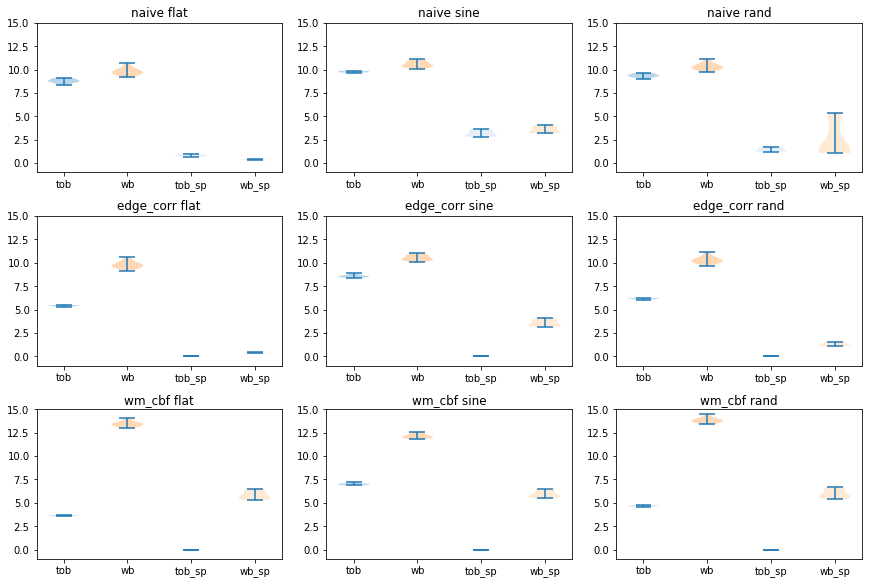

In [13]:
fig, axes = plt.subplots(3,3, constrained_layout=True)
fig.set_size_inches(12,8)
for expidx,exp in enumerate(EXPERIMENTS):
    for idx,ax in enumerate(axes[expidx,:]):
        ax.set_title('%s %s' % (exp, TESTS[idx]))
        violins = ax.violinplot(vsv[expidx,:,idx,:,0].T)
        [v.set_facecolor(cmap[c,:]) for c,v in zip([0,2,1,3], violins['bodies'])]
        ax.set_xticks(range(1,5))
        ax.set_xticklabels(METHODS)
        ax.set_ylim(-1, 15)
        
plt.show()

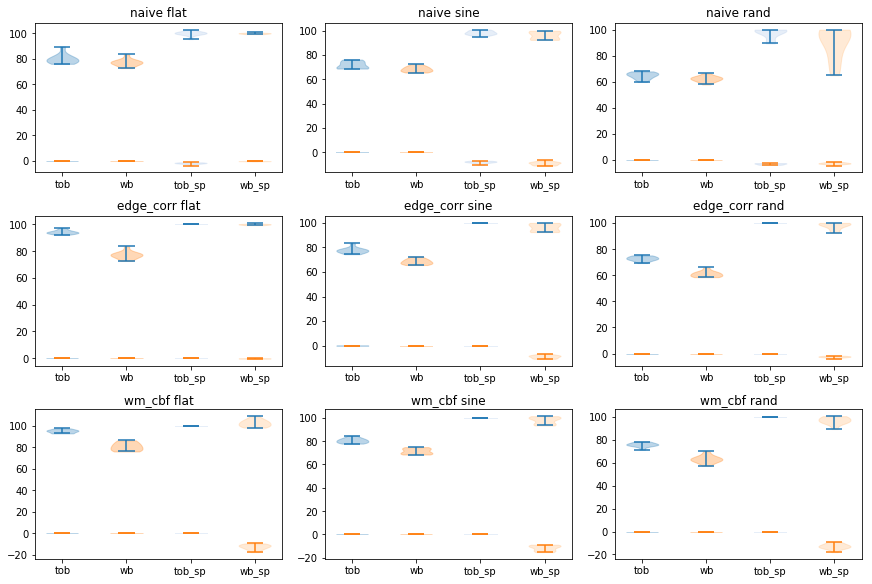

In [14]:
fig, axes = plt.subplots(3,3, constrained_layout=True)
fig.set_size_inches(12,8)
for expidx,exp in enumerate(EXPERIMENTS):
    for idx,ax in enumerate(axes[expidx,:]):
        ax.set_title('%s %s' % (exp, TESTS[idx]))
        ax.set_xticks(range(1,5))
        ax.set_xticklabels(METHODS)
        
        violins = ax.violinplot(vsv[expidx,:,idx,:,1].T)
        for c,v in zip([0,2,1,3], violins['bodies']):
            v.set_facecolor(cmap[c,:])
            v.set_edgecolor(cmap[c,:])
            
        violins = ax.violinplot(vsv[expidx,:,idx,:,2].T)
        for c,v in zip([0,2,1,3], violins['bodies']):
            v.set_facecolor(cmap[c,:])
            v.set_edgecolor(cmap[c,:])
            

#         ax.set_ylim(-1, 15)
        
plt.show()

In [15]:
# %qtconsole

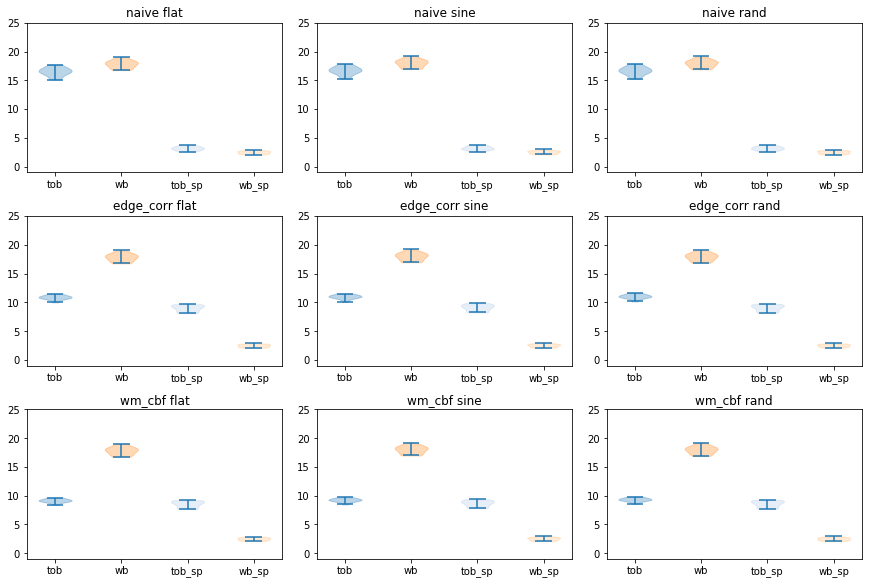

In [16]:
fig, axes = plt.subplots(3,3, constrained_layout=True)
fig.set_size_inches(12,8)
for expidx,exp in enumerate(EXPERIMENTS):
    for idx,ax in enumerate(axes[expidx,:]):
        ax.set_title('%s %s' % (exp, TESTS[idx]))
        ax.set_xticks(range(1,5))
        ax.set_xticklabels(METHODS)
        ax.set_ylim(-1, 25)
        
        violins = ax.violinplot(svs[expidx,:,idx,:,0].T)
        for c,v in zip([0,2,1,3], violins['bodies']):
            v.set_facecolor(cmap[c,:])
            v.set_edgecolor(cmap[c,:])
        
plt.show()

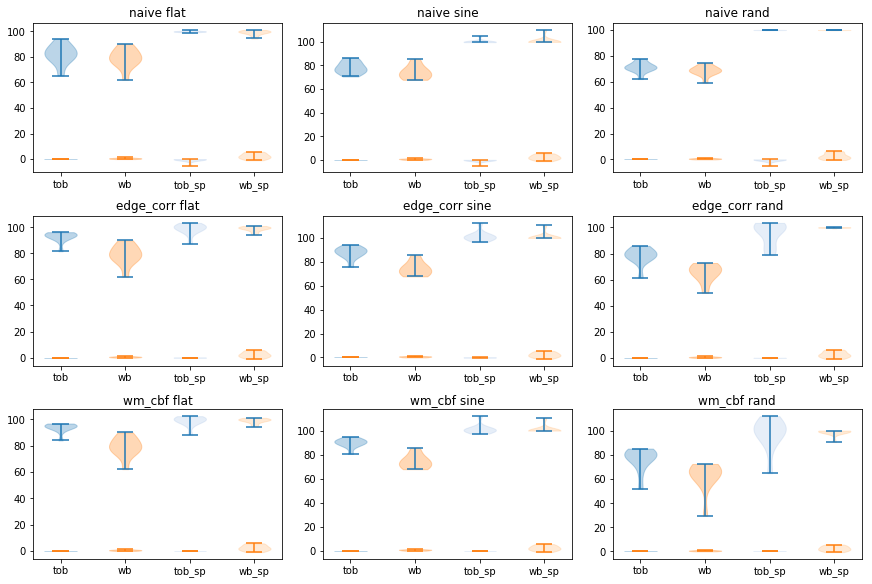

In [17]:
fig, axes = plt.subplots(3,3, constrained_layout=True)
fig.set_size_inches(12,8)
for expidx,exp in enumerate(EXPERIMENTS):
    for idx,ax in enumerate(axes[expidx,:]):
        ax.set_title('%s %s' % (exp, TESTS[idx]))
        ax.set_xticks(range(1,5))
        ax.set_xticklabels(METHODS)
        
        violins = ax.violinplot(svs[expidx,:,idx,:,1].T)
        for c,v in zip([0,2,1,3], violins['bodies']):
            v.set_facecolor(cmap[c,:])
            v.set_edgecolor(cmap[c,:])
            
        violins = ax.violinplot(svs[expidx,:,idx,:,2].T)
        for c,v in zip([0,2,1,3], violins['bodies']):
            v.set_facecolor(cmap[c,:])
            v.set_edgecolor(cmap[c,:])
        
#         ax.set_ylim(-1, 25)
        
plt.show()